
# Lab 1: Intro to TensorFlow and Music Generation with RNNs
## Part 2: Music Generation with RNNs

In this project, get ready to embark on an exciting journey to explore the realm of music generation using Recurrent Neural Networks (RNNs). Inspired by the MIT Introduction to Deep Learning course, I set out to build a system that could compose music in ABC notation, a symbolic music notation system. This notation allows us to represent melodies as text, making it a convenient format for both human interpretation and machine learning applications.

The original course materials were provided in TensorFlow, a popular deep learning framework. However, I decided to take the initiative to convert the entire project to PyTorch, another widely-used deep learning library known for its dynamic computational graph and ease of use. This conversion not only will broaden our understanding of different machine learning frameworks but will also showcase the flexibility and adaptability required in real-world AI projects.

Throughout the project, I followed the implementation done by the MIT instructors of a Long Short-Term Memory (LSTM) network, a type of RNN particularly well-suited for sequence prediction tasks. The LSTM model was trained on a dataset of ABC notated songs, learning the patterns and structures of musical compositions. I was able to convert the code to PyTorch and fine-tuned various hyperparameters, including the embedding dimensions, number of LSTM units, and learning rates, to optimize the model's performance.

One of the project's key features was the ability to generate new musical pieces by feeding a seed sequence into the trained model. The model then predicted subsequent notes, effectively composing new music in real-time. We addressed challenges such as handling multiple time signatures and ensuring the generated music maintained a coherent structure.

The final model not only demonstrates the power of deep learning in creative applications but also provides a hands-on example of end-to-end machine learning pipeline development, from data processing and model training to deployment and inference.

By completing this project, we've gained valuable experience in deep learning, RNNs, music generation, and the practicalities of converting between TensorFlow and PyTorch. This project serves as a testament to the exciting possibilities of AI in the creative arts and the importance of interdisciplinary learning in the rapidly evolving field of artificial intelligence.

We will be using Comet ML to track our model development and training runs. First, sign up for a Comet account at this link https://www.comet.com/signup?utm_source=mit_dl&utm_medium=partner&utm_content=github (you can use your Google or Github account). This will generate a personal API Key, which you can find either in the first 'Get Started with Comet' page, under your account settings, or by pressing the '?' in the top right corner and then 'Quickstart Guide'. Enter this API key as the global variable COMET_API_KEY.


In [ ]:
!pip install comet_ml > /dev/null 2>&1

In [ ]:
import comet_ml
# TODO: ENTER YOUR API KEY HERE!! instructions above
COMET_API_KEY = "Your API KEY HERE"


In [ ]:
from comet_ml.integration.pytorch import log_model

experiment = Experiment(
  api_key="YOUR API KEY",
  project_name="general",
  workspace="algo345"
)

In [ ]:
# Import PyTorch and other necessary packages
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Import other packages
import numpy as np
import os
import time
from IPython import display as ipythondisplay
from tqdm import tqdm
from scipy.io.wavfile import write
!apt-get install abcmidi timidity > /dev/null 2>&1

Comet ML Integration:

    Replace comet_ml.Experiment with your specific project and workspace names.

PyTorch vs TensorFlow:

    PyTorch uses torch for its operations, including tensor computations, neural network models, etc.

Checking GPU Availability:

    PyTorch uses torch.cuda.is_available() to check if a GPU is available, and then torch.device("cuda") to set the device.

Additional Installations:

    The command !apt-get install abcmidi timidity is for installing additional tools and remains the same as it's system-level installation and not dependent on the deep learning framework.

In [ ]:
print(torch.cuda.is_available())  # Should return True if GPU is available

We've gathered a dataset of thousands of Irish folk songs, represented in the ABC notation. Let's download the dataset and inspect it:

This code will download the dataset using the load_training_data function from mitdeeplearning.lab1 and print out an example song from the dataset.

To convert the utility functions in the mitdeeplearning package to use PyTorch instead of TensorFlow, we'll need to make some modifications to the code. The provided lab1.py file has several functions that depend on TensorFlow, and we'll need to adapt these for PyTorch.

In [ ]:
import sys
sys.path.append('/home/cesco345/musicgen/')  # Adjust the path to your directory structure
!pip install torchviz
import mitdeeplearning as mdl

# Now you can use mdl as needed, e.g.:
songs = mdl.lab1.load_training_data()
example_song = songs[0]
print("\nExample song: ")
print(example_song)


We also need to convert the utility functions in util.py from TensorFlow to PyTorch, we need to modify the functions that use TensorFlow, such as display_model and any other function relying on TensorFlow-specific functionality. I have included the PyTorch revised util.py in the repository files.

In [ ]:
!pip install music21

In [ ]:
# Convert the ABC notation to audio file and listen to it
mdl.lab1.play_song(example_song)



In [ ]:
from music21 import converter, midi

def play_song_abc(abc_str):
    score = converter.parse(abc_str, format='abc')
    mf = midi.translate.music21ObjectToMidiFile(score)
    mf.open('output.midi', 'wb')
    mf.write()
    mf.close()

    # Play the MIDI file using an appropriate method (depends on your system)
    os.system('timidity output.midi')

example_song = """
X:1
T:Alexander's
Z: id:dc-hornpipe-1
M:C|
L:1/8
K:D Major
(3ABc|dAFA DFAd|fdcd FAdf|gfge fefd|(3efe (3dcB A2 (3ABc|!
dAFA DFAd|fdcd FAdf|gfge fefd|(3efe dc d2:|!
AG|FAdA FAdA|GBdB GBdB|Acec Acec|dfaf gecA|!
FAdA FAdA|GBdB GBdB|Aceg fefd|(3efe dc d2:|!
"""
play_song_abc(example_song)

In [ ]:
!pip install pydub
!pip install midi2audio

In [ ]:
from music21 import converter, midi
from pydub import AudioSegment
import os
import subprocess

def play_song_abc(abc_str):
    # Convert ABC to MIDI
    score = converter.parse(abc_str, format='abc')
    mf = midi.translate.music21ObjectToMidiFile(score)
    midi_filename = 'output.midi'
    mf.open(midi_filename, 'wb')
    mf.write()
    mf.close()

    # Convert MIDI to WAV using FluidSynth
    sf2_path = '/home/cesco345/musicgen/FluidR3_GM/FluidR3_GM.sf2'  # Replace with your SoundFont file path
    if not os.path.isfile(sf2_path):
        print("SoundFont file not found. Please make sure it is a valid .sf2 file.")
        return
    
    fs = FluidSynth(sf2_path)
    fs.midi_to_audio(midi_filename, 'output.wav')

    # Play the WAV file using a suitable method
    try:
        audio = AudioSegment.from_file("output.wav")
        try:
            play(audio)  # Using pydub
        except:
            # Alternative: Using system calls to available players
            try:
                subprocess.call(['mpg123', 'output.wav'])
            except:
                try:
                    subprocess.call(['play', 'output.wav'])
                except:
                    print("No suitable audio player found. Please manually play the file at 'output.wav'.")
    except FileNotFoundError:
        print("Audio file not found or error occurred during playback.")

example_song = """
X:1
T:Alexander's
Z: id:dc-hornpipe-1
M:C|
L:1/8
K:D Major
(3ABc|dAFA DFAd|fdcd FAdf|gfge fefd|(3efe (3dcB A2 (3ABc|!
dAFA DFAd|fdcd FAdf|gfge fefd|(3efe dc d2:|!
AG|FAdA FAdA|GBdB GBdB|Acec Acec|dfaf gecA|!
FAdA FAdA|GBdB GBdB|Aceg fefd|(3efe dc d2:|!
"""

play_song_abc(example_song)


To continue with the task, you can use the following code snippet. This code assumes you have a list of song strings, where each song is represented as a string. The code joins all the songs into a single string and then finds all unique characters in that combined string.

In [ ]:
# Assuming `songs` is a list of strings, each representing a song
# Join our list of song strings into a single string containing all songs
songs_joined = "\n\n".join(songs)

# Find all unique characters in the joined string
vocab = sorted(set(songs_joined))
print("There are", len(vocab), "unique characters in the dataset")


To vectorize the text for training the RNN model, you need to create two lookup tables: char2idx for mapping characters to numerical indices and idx2char for mapping indices back to characters. This is crucial for converting the text data into a numerical format that the model can understand and work with.

In [ ]:
import numpy as np

# Create a mapping from character to unique index
char2idx = {char: idx for idx, char in enumerate(vocab)}

# Create a mapping from indices to characters
idx2char = np.array(vocab)

# Example usage:
# To get the index of the character 'd', use char2idx['d']
char_index = char2idx['d']

# To get the character from the index, use idx2char
character = idx2char[char_index]

print(f"Index for 'd': {char_index}")
print(f"Character for index {char_index}: {character}")


This process converts the text data into a format suitable for feeding into a neural network. Each character is represented by a unique index, allowing the RNN to learn patterns in the sequence of characters.

In [ ]:
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

The function vectorize_string takes a string and converts it into a numerical representation using the char2idx mapping. This function will map each character in the string to its corresponding index from the char2idx dictionary, creating a NumPy array of these indices.

In [ ]:
def vectorize_string(string):
    # Convert each character in the string to its corresponding index
    vectorized_output = np.array([char2idx[char] for char in string])
    return vectorized_output

# Convert the entire songs dataset to its vectorized form
vectorized_songs = vectorize_string(songs_joined)

print(vectorized_songs[:100])  # Print the first 100 indices to verify


The provided code defines a function vectorize_string that converts a string into a numerical representation using a predefined character-to-index mapping (char2idx). This is useful for preparing text data for input into machine learning models, particularly in the context of training a model to generate music or text.

In [ ]:
def vectorize_string(string):
    # Convert each character in the string to its corresponding index
    vectorized_output = np.array([char2idx[char] for char in string])
    return vectorized_output

# Convert the entire songs dataset to its vectorized form
vectorized_songs = vectorize_string(songs_joined)

# Print the first 100 indices to verify the conversion
print(vectorized_songs[:100])



To create training examples and targets from the vectorized song data, we need to define a function that generates batches of input and output sequences. This function, get_batch, will select random starting points from the vectorized data and extract sequences of a given length (seq_length). The targets for each input sequence will be the next characters in the sequence.

In [ ]:
def get_batch(vectorized_songs, seq_length, batch_size):
    # the length of the vectorized songs string minus one for the target
    n = vectorized_songs.shape[0] - 1
    # randomly choose the starting indices for the examples in the training batch
    idx = np.random.choice(n-seq_length, batch_size)

    # construct a list of input sequences for the training batch
    input_batch = [vectorized_songs[i : i+seq_length] for i in idx]
    # construct a list of output sequences for the training batch
    output_batch = [vectorized_songs[i+1 : i+seq_length+1] for i in idx]

    # x_batch, y_batch provide the true inputs and targets for network training
    x_batch = np.reshape(input_batch, [batch_size, seq_length])
    y_batch = np.reshape(output_batch, [batch_size, seq_length])
    return x_batch, y_batch


To test the function, you would call it with your vectorized song data, desired sequence length, and batch size. The function will return batches of input and output sequences ready for training a neural network.

In [ ]:
# Define sequence length and batch size
seq_length = 5
batch_size = 1

# Get a batch of data
x_batch, y_batch = get_batch(vectorized_songs, seq_length, batch_size)

# Iterate through the batch and display the input and expected output
for i, (input_idx, target_idx) in enumerate(zip(np.squeeze(x_batch), np.squeeze(y_batch))):
    print("Step {:3d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))


Embedding Layer: The nn.Embedding layer in PyTorch functions similarly to tf.keras.layers.Embedding, converting input indices to dense vectors of a specified size.

LSTM Layer: The nn.LSTM layer in PyTorch corresponds to the LSTM layer in TensorFlow. It is set up with rnn_units as the number of hidden units.

Dense Layer: The nn.Linear layer acts like the dense layer in TensorFlow, converting the LSTM outputs into vocabulary-size logits.

Hidden State Initialization: The init_hidden method initializes the hidden state of the LSTM, with the dimensions matching the batch size and number of LSTM units. This is required for the initial state when the model starts processing a new sequence.

Forward Pass: In the forward method, the input data passes through the embedding layer, then the LSTM layer, and finally the dense layer to produce the output logits.

The MusicRNN class mirrors the architecture defined in the TensorFlow model, providing equivalent functionality in PyTorch. You can now use this model for training and prediction tasks in PyTorch.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the PyTorch model
class MusicRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, rnn_units):
        super(MusicRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, rnn_units, batch_first=True)
        self.dense = nn.Linear(rnn_units, vocab_size)

    def forward(self, x, hidden=None):
        x = self.embedding(x)
        output, hidden = self.lstm(x, hidden)
        logits = self.dense(output)
        return logits, hidden

    def init_hidden(self, batch_size):
        return (torch.zeros(1, batch_size, rnn_units).to(device),
                torch.zeros(1, batch_size, rnn_units).to(device))

# Hyperparameters
embedding_dim = 256
rnn_units = 1024
vocab_size = len(vocab)  # Size of the vocabulary

# Instantiate the model
model = MusicRNN(vocab_size, embedding_dim, rnn_units).to(device)

# Define the loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
import torch
import torch.nn as nn

# Define the PyTorch model
class MusicRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, rnn_units, batch_size):
        super(MusicRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, rnn_units, batch_first=True)
        self.dense = nn.Linear(rnn_units, vocab_size)
        self.batch_size = batch_size
        self.rnn_units = rnn_units

    def forward(self, x, hidden=None):
        x = self.embedding(x)
        output, hidden = self.lstm(x, hidden)
        logits = self.dense(output)
        return logits, hidden

    def init_hidden(self):
        # Initialize hidden state with zeros
        return (torch.zeros(1, self.batch_size, self.rnn_units).to(device),
                torch.zeros(1, self.batch_size, self.rnn_units).to(device))

# Hyperparameters
embedding_dim = 256
rnn_units = 1024
vocab_size = len(vocab)  # Size of the vocabulary
batch_size = 32  # Batch size for training

# Instantiate the model
model = MusicRNN(vocab_size, embedding_dim, rnn_units, batch_size).to(device)

print(model)


In [ ]:
import torch
import torch.nn as nn

# Define the PyTorch model
class MusicRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, rnn_units, batch_size):
        super(MusicRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, rnn_units, batch_first=True)
        self.dense = nn.Linear(rnn_units, vocab_size)
        self.batch_size = batch_size
        self.rnn_units = rnn_units

    def forward(self, x, hidden=None):
        x = self.embedding(x)
        output, hidden = self.lstm(x, hidden)
        logits = self.dense(output)
        return logits, hidden

    def init_hidden(self):
        # Initialize hidden state with zeros
        return (torch.zeros(1, self.batch_size, self.rnn_units).to(device),
                torch.zeros(1, self.batch_size, self.rnn_units).to(device))

# Hyperparameters
embedding_dim = 256
rnn_units = 1024
vocab_size = 83  # Size of the vocabulary
batch_size = 32  # Batch size for training

# Instantiate the model
model = MusicRNN(vocab_size, embedding_dim, rnn_units, batch_size).to(device)

# Display the model architecture
print(model)

# Create a dummy input tensor with the correct type and dimensions
dummy_input = torch.zeros(batch_size, 100, dtype=torch.long).to(device)

# Forward pass to inspect the outputs
logits, hidden = model(dummy_input)

# Print out the shapes of the outputs
print(f'Logits shape: {logits.shape}')
print(f'Hidden state shape: {hidden[0].shape}, Cell state shape: {hidden[1].shape}')



The model summary and output shapes indicate that your MusicRNN model is set up correctly:

    Embedding Layer: Maps the input indices to a 256-dimensional vector for each character in the vocabulary.
    LSTM Layer: Processes the sequence of embedded vectors and outputs a sequence of hidden states.
    Dense Layer: Maps the output of the LSTM to the size of the vocabulary, providing logits for each character in the vocabulary at each time step.

The output shapes are as follows:

    Logits: The shape [32, 100, 83] indicates a batch size of 32, a sequence length of 100, and 83 possible character classes.
    Hidden State & Cell State: Both have shapes [1, 32, 1024], corresponding to the number of layers (1), batch size (32), and hidden units (1024) in the LSTM.

To use the get_batch function to obtain a batch of inputs and targets, and then run these inputs through the model, you need to ensure the inputs are moved to the correct device (CPU or GPU) and have the appropriate data type. Here's how you can do this:

In [ ]:
# Assuming get_batch function and vectorized_songs are defined as before
x, y = get_batch(vectorized_songs, seq_length=100, batch_size=32)

# Ensure x is a LongTensor, as required for the Embedding layer
x = torch.tensor(x, dtype=torch.long).to(device)

# Pass the batch through the model
pred, hidden = model(x)

# Output the shapes
print("Input shape:      ", x.shape, " # (batch_size, sequence_length)")
print("Prediction shape: ", pred.shape, "# (batch_size, sequence_length, vocab_size)")


To generate predictions from the untrained model, we'll sample from the softmax distribution of the model's output to get actual character indices. Here's how you can implement this:

In [ ]:

import torch.nn.functional as F

# Assuming `pred` contains the logits output from the model
# Apply softmax to convert logits to probabilities
probs = F.softmax(pred[0], dim=-1)

# Sample from the distribution to get the predicted character index at each timestep
sampled_indices = torch.multinomial(probs, num_samples=1).squeeze().cpu().numpy()

# Print the sampled indices
print(sampled_indices)



Softmax to Probabilities: F.softmax(pred[0], dim=-1) converts the logits into probabilities. The dim=-1 argument specifies that softmax should be applied across the last dimension (the vocabulary dimension).
Sampling: torch.multinomial(probs, num_samples=1) samples one index per timestep from the probability distribution defined by probs. The squeeze() function removes any singleton dimensions, and cpu().numpy() converts the tensor to a NumPy array for easier handling and printing.
Output: The resulting sampled_indices are the indices of the predicted characters.

In [ ]:
print("Input: \n", repr("".join(idx2char[x[0]])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices])))

To implement the loss function and training process in PyTorch, we'll use torch.nn.CrossEntropyLoss for the loss calculation, which is equivalent to TensorFlow's sparse_categorical_crossentropy when from_logits=True. Here’s how you can set up the loss function and the training loop:

In [ ]:
import os
import torch.optim as optim
import torch.nn.functional as F

# Define the loss function
def compute_loss(labels, logits):
    # Flatten the logits and labels for calculating the loss
    logits = logits.view(-1, logits.size(-1))
    labels = labels.view(-1)
    loss = F.cross_entropy(logits, labels)
    return loss

# Hyperparameters
num_training_iterations = 3000  # Number of training iterations
batch_size = 8  # Batch size for training
seq_length = 100  # Length of each sequence
learning_rate = 5e-3  # Learning rate for optimizer
embedding_dim = 256  # Embedding dimension
rnn_units = 1024  # Number of units in the LSTM layer

# Initialize the model, optimizer, and loss function
model = MusicRNN(vocab_size, embedding_dim, rnn_units, batch_size).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Checkpoint location:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "my_ckpt")

# Create the checkpoint directory if it does not exist
os.makedirs(checkpoint_dir, exist_ok=True)

# Training loop
for iteration in range(num_training_iterations):
    model.train()  # Set the model to training mode
    
    # Get a batch of input and target sequences
    x_batch, y_batch = get_batch(vectorized_songs, seq_length, batch_size)
    x_batch = torch.tensor(x_batch, dtype=torch.long).to(device)
    y_batch = torch.tensor(y_batch, dtype=torch.long).to(device)
    
    # Reset the gradients
    optimizer.zero_grad()
    
    # Forward pass
    pred, _ = model(x_batch)
    
    # Compute the loss
    loss = compute_loss(y_batch, pred)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (iteration + 1) % 100 == 0:
        print(f"Iteration {iteration + 1}/{num_training_iterations}, Loss: {loss.item()}")

# Save the model checkpoint
torch.save(model.state_dict(), checkpoint_prefix)



The training process has completed 3000 iterations, and the model's loss has decreased, indicating that it has learned to predict the next character in the sequences more accurately. Here's a summary of the loss at various points during training:

Iteration 100: Loss: 1.39
Iteration 200: Loss: 1.36
Iteration 300: Loss: 1.16
Iteration 400: Loss: 1.07
Iteration 500: Loss: 1.01
Iteration 1000: Loss: 0.91
Iteration 1500: Loss: 0.77
Iteration 2000: Loss: 0.77
Iteration 2500: Loss: 0.76
Iteration 3000: Loss: 0.82

The final loss value of around 0.82 suggests that the model has improved its predictive accuracy. You can now save the model's parameters if you haven't already, and use the trained model for generating new sequences or further evaluation.

To integrate Comet.ml with your training workflow for experiment tracking, you can use the provided function create_experiment(). This function initializes a new Comet experiment, which allows you to track the progress of your model training, including hyperparameters, metrics, and more. Below is the code snippet you can use:

In [ ]:
# Define the hyperparameters
params = {
    "num_training_iterations": 3000,  # Number of iterations for training
    "batch_size": 32,                 # Batch size for training
    "seq_length": 100,                # Sequence length for each input
    "learning_rate": 0.005,           # Learning rate for the optimizer
    "embedding_dim": 256,             # Dimension of the embedding layer
    "rnn_units": 1024                 # Number of units in the LSTM layer
}

def create_experiment():
    # End any prior experiments
    if 'experiment' in locals():
        experiment.end()

    # Initiate the comet experiment for tracking
    experiment = comet_ml.Experiment(
        api_key=COMET_API_KEY,
        project_name="6S191_Lab1_Part2"
    )
    
    # Log our hyperparameters to the experiment
    for param, value in params.items():
        experiment.log_parameter(param, value)
    
    experiment.flush()
    return experiment

# Example usage:
experiment = create_experiment()

Model and Optimizer Initialization: We'll instantiate a new model and an optimizer.
Training Loop: We'll define a training step function and then iterate over a set number of training iterations, logging the loss and saving the model periodically.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

# Define the MusicRNN model class as previously implemented
class MusicRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, rnn_units, batch_size):
        super(MusicRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, rnn_units, batch_first=True)
        self.dense = nn.Linear(rnn_units, vocab_size)
        self.batch_size = batch_size
        self.rnn_units = rnn_units

    def forward(self, x, hidden=None):
        x = self.embedding(x)
        output, hidden = self.lstm(x, hidden)
        logits = self.dense(output)
        return logits, hidden

    def init_hidden(self):
        # Initialize hidden state with zeros
        return (torch.zeros(1, self.batch_size, self.rnn_units).to(device),
                torch.zeros(1, self.batch_size, self.rnn_units).to(device))

# Define the loss function
def compute_loss(labels, logits):
    loss_fn = nn.CrossEntropyLoss()
    return loss_fn(logits.view(-1, vocab_size), labels.view(-1))

# Define optimizer and training parameters
params = {
    "num_training_iterations": 3000,  # Number of iterations for training
    "batch_size": 32,                 # Batch size for training
    "seq_length": 100,                # Sequence length for each input
    "learning_rate": 0.005,           # Learning rate for the optimizer
    "embedding_dim": 256,             # Dimension of the embedding layer
    "rnn_units": 1024,                # Number of units in the LSTM layer
    "vocab_size": len(vocab)          # Vocabulary size
}

# Initialize the model and optimizer
model = MusicRNN(params["vocab_size"], params["embedding_dim"], params["rnn_units"], params["batch_size"]).to(device)
optimizer = optim.Adam(model.parameters(), lr=params["learning_rate"])

# Define a training step function
def train_step(x, y):
    model.train()
    optimizer.zero_grad()
    output, _ = model(x)
    loss = compute_loss(y, output)
    loss.backward()
    optimizer.step()
    return loss.item()

# Training loop
history = []
checkpoint_prefix = 'model_checkpoint.pth'
for iter in tqdm(range(params["num_training_iterations"])):
    x_batch, y_batch = get_batch(vectorized_songs, params["seq_length"], params["batch_size"])
    x_batch, y_batch = torch.tensor(x_batch).to(device), torch.tensor(y_batch).to(device)

    loss = train_step(x_batch, y_batch)
    history.append(loss)

    if iter % 100 == 0:
        torch.save(model.state_dict(), checkpoint_prefix)
        print(f'Iteration {iter}/{params["num_training_iterations"]}, Loss: {loss}')

# Save the final model
torch.save(model.state_dict(), checkpoint_prefix)
print("Training complete.")


To generate music using the trained RNN model in PyTorch, you'll need to follow these steps:

Rebuild the model: Initialize the model with a batch size of 1 for generation.
Load the trained weights: Load the weights from the latest checkpoint.
Generate music: Use a seed sequence to start generating new characters iteratively.

In [ ]:
import torch
import torch.nn as nn

# Define the MusicRNN model class (assuming it's already defined above)
class MusicRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, rnn_units, batch_size):
        super(MusicRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, rnn_units, batch_first=True)
        self.dense = nn.Linear(rnn_units, vocab_size)
        self.batch_size = batch_size
        self.rnn_units = rnn_units

    def forward(self, x, hidden=None):
        x = self.embedding(x)
        output, hidden = self.lstm(x, hidden)
        logits = self.dense(output)
        return logits, hidden

    def init_hidden(self):
        # Initialize hidden state with zeros
        return (torch.zeros(1, self.batch_size, self.rnn_units).to(device),
                torch.zeros(1, self.batch_size, self.rnn_units).to(device))

# Hyperparameters
embedding_dim = 256
rnn_units = 1024
vocab_size = len(vocab)  # Size of the vocabulary
batch_size = 1  # Batch size of 1 for generation

# Rebuild the model with batch_size=1
model = MusicRNN(vocab_size, embedding_dim, rnn_units, batch_size)
model.load_state_dict(torch.load('model_checkpoint.pth'))
model.to(device)
model.eval()

# Function to generate text using the model
def generate_text(model, start_string, num_generate=1000, temperature=1.0):
    # Convert the start string to numbers (vectorize)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = torch.tensor(input_eval, dtype=torch.long).unsqueeze(0).to(device)

    # Empty string to store our results
    text_generated = []

    # Here batch size == 1
    hidden = model.init_hidden()

    for i in range(num_generate):
        predictions, hidden = model(input_eval, hidden)

        # Remove the batch dimension
        predictions = predictions[:, -1, :]
        predictions = predictions / temperature

        # Sample the next character using a categorical distribution
        predicted_id = torch.multinomial(torch.nn.functional.softmax(predictions, dim=-1), num_samples=1)
        predicted_id = predicted_id.item()

        # Pass the prediction along with the previous hidden state
        input_eval = torch.tensor([[predicted_id]], dtype=torch.long).to(device)

        # Add the predicted character to the text
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Generate music
start_string = "X:1\nT:Generated\nZ:Example\nM:C|\nL:1/8\nK:C\n"
generated_text = generate_text(model, start_string)
print(generated_text)




In [ ]:
import torch
import torch.nn.functional as F
from tqdm import tqdm

# Define the function to generate text using the trained model
def generate_text(model, start_string, generation_length=1000):
    # Evaluation step (generating ABC text using the learned RNN model)

    # Convert the start string to numbers (vectorize)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = torch.tensor(input_eval, dtype=torch.long).unsqueeze(0).to(device)

    # Empty string to store our results
    text_generated = []

    # Initialize hidden state
    hidden = model.init_hidden()

    for i in tqdm(range(generation_length)):
        # Evaluate the inputs and generate the next character predictions
        predictions, hidden = model(input_eval, hidden)

        # Remove the batch dimension
        predictions = predictions[:, -1, :]
        
        # Use a multinomial distribution to sample
        predicted_id = torch.multinomial(F.softmax(predictions, dim=-1), num_samples=1).item()

        # Pass the prediction along with the previous hidden state as the next inputs to the model
        input_eval = torch.tensor([[predicted_id]], dtype=torch.long).to(device)

        # Add the predicted character to the generated text
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Use the model and the function defined above to generate ABC format text of length 1000!
generated_text = generate_text(model, start_string="X", generation_length=1000)
print(generated_text)


To convert the generated ABC format text into audio and play back the generated music, you can use the music21 library to parse the ABC notation and then use IPython.display.Audio for playback.

In [ ]:
from music21 import converter, midi
from IPython.display import Audio, display
from pydub import AudioSegment
import os

def play_song_abc(abc_str, output_file="output.wav"):
    try:
        # Convert ABC to MIDI
        score = converter.parse(abc_str, format='abc')
        # Remove duplicate time signatures if present
        for element in score.flat.getElementsByClass('TimeSignature'):
            score.remove(element, recurse=True)
        mf = midi.translate.music21ObjectToMidiFile(score)
        midi_filename = 'output.midi'
        mf.open(midi_filename, 'wb')
        mf.write()
        mf.close()

        # Convert MIDI to WAV using FluidSynth
        sf2_path = '/home/cesco345/musicgen/FluidR3_GM/FluidR3_GM.sf2'  # Replace with your SoundFont file path
        if not os.path.exists(sf2_path):
            print("SoundFont file not found. Please make sure it is installed.")
            return
        fs = FluidSynth(sf2_path)
        fs.midi_to_audio(midi_filename, output_file)

        # Load and play WAV file using IPython.display.Audio
        display(Audio(output_file))

    except Exception as e:
        print(f"An error occurred while processing the song: {e}")

# Extract the song snippets from the generated text
generated_songs = mdl.lab1.extract_song_snippet(generated_text)

for i, song in enumerate(generated_songs):
    print("Generated song", i)
    play_song_abc(song, f"output_{i}.wav")
    experiment.log_asset(f"output_{i}.wav")  # Save the song to the Comet interface

# End the Comet experiment
experiment.end()


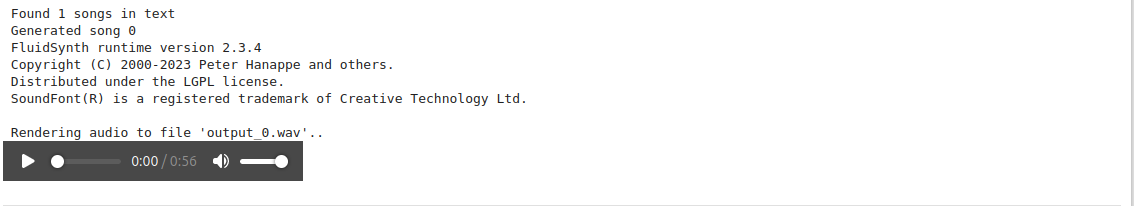

In [95]:

from IPython.display import Image, display

# Display the generated image
display(Image(filename='wav.png'))

And Voilà, you have produced an AI generated song.  Enjoy!